In [15]:
import pandas as pd
import numpy as np

In [98]:
dallas = pd.read_csv("/Users/joshnoble/projects/w210/evictions/NTEP_eviction_cases.csv", low_memory=False)

In [86]:
dallas.head()

,case_number,date,amount,precinct_id,council_id,tract_id,zip_id,city_id,county_id,lon,lat
0,1804351H,2018-07-10,1590.0,48113-1-1,4819000-07,4.811300e+10,75215.0,4819000.0,48113,-96.780003,32.762274
1,1804378H,2018-07-10,1217.0,48113-1-1,4819000-07,4.811300e+10,75215.0,4819000.0,48113,-96.757373,32.767008
2,1804374H,2018-07-10,0.0,48113-1-1,4819000-07,4.811300e+10,75210.0,4819000.0,48113,-96.743293,32.775399
3,1804376H,2018-07-10,700.0,48113-1-1,4819000-07,4.811300e+10,75210.0,4819000.0,48113,-96.743307,32.775385
4,1804375H,2018-07-10,700.0,48113-1-1,4819000-07,4.811300e+10,75210.0,4819000.0,48113,-96.742441,32.776028


In [99]:
dallas = dallas[(dallas['amount'] > 0) & (dallas['date'].notna()) & (dallas['tract_id'].notna())]

dallas['tract_id'] = dallas['tract_id'].astype(np.int64)

In [88]:
dallas.head()

,case_number,date,amount,precinct_id,council_id,tract_id,zip_id,city_id,county_id,lon,lat
0,1804351H,2018-07-10,1590.0,48113-1-1,4819000-07,48113003400,75215.0,4819000.0,48113,-96.780003,32.762274
1,1804378H,2018-07-10,1217.0,48113-1-1,4819000-07,48113003700,75215.0,4819000.0,48113,-96.757373,32.767008
3,1804376H,2018-07-10,700.0,48113-1-1,4819000-07,48113002701,75210.0,4819000.0,48113,-96.743307,32.775385
4,1804375H,2018-07-10,700.0,48113-1-1,4819000-07,48113002701,75210.0,4819000.0,48113,-96.742441,32.776028
5,1804377H,2018-07-10,656.0,48113-1-1,4819000-14,48113003101,75201.0,4819000.0,48113,-96.798797,32.781548


In [172]:
dallas.to_csv("cleaned_dallas_records.csv")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ffda8683880>]],
      dtype=object)

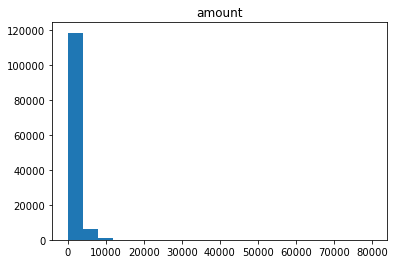

In [89]:
dallas.hist(column='amount', bins=20, grid=False)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ffdd8fd95b0>]],
      dtype=object)

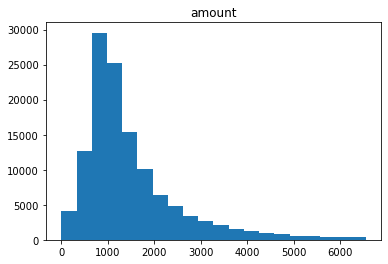

In [100]:
from scipy import stats

dallas = dallas[(np.abs(stats.zscore(dallas['amount'])) < 3)]
dallas.hist(column='amount', bins=20, grid=False)

In [153]:
grouped_df = dallas.groupby(["tract_id"])
#grouped_df[["amount"]].mean().sort_values('tract')
most_common_tracts = grouped_df['tract_id'].count().sort_values(ascending=False)

In [129]:
most_common_tracts[:40]

tract_id
48113016607    2323
48113019035    1837
48113010902    1684
48113012604    1624
48113007811    1482
48113010904    1472
48113018503    1446
48113018506    1292
48113007202    1021
48113012210    1014
48113016804     896
48113013011     894
48113008604     883
48113012000     883
48113013010     872
48113020400     861
48113013806     841
48113017813     828
48113013615     823
48113019040     814
Name: tract_id, dtype: int64

In [173]:
means = []

for key in most_common_tracts[:40].keys():
    print(key)
    t = dallas[dallas['tract_id'] == key]
    means.append({'tract' : key, 'mean' : t['amount'].mean(), 'max' : t['amount'].max(), 'min' : t['amount'].min()})

48113016607
48113019035
48113010902
48113012604
48113007811
48113010904
48113018503
48113018506
48113007202
48113012210
48113016804
48113013011
48113008604
48113012000
48113013010
48113020400
48113013806
48113017813
48113013615
48113019040
48113008704
48113009304
48113008701
48113017805
48113007818
48113012302
48113016605
48113013621
48113011001
48113007201
48113018505
48113006100
48113012100
48113014403
48113002000
48113017004
48113006800
48113011401
48113018138
48113006002


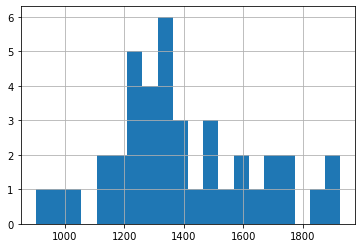

In [175]:
means_df = pd.DataFrame(means)
means_df['mean'].hist(bins=20)

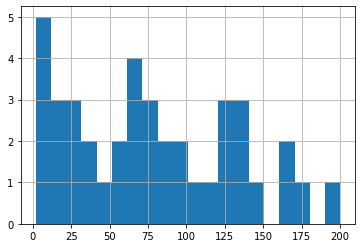

In [176]:
means_df['min'].hist(bins=20)

In [177]:
date_grouped_df = dallas.groupby(["date"])

In [193]:
dallas['week_dt'] = pd.to_datetime(dallas['date']) - pd.to_timedelta(7, unit='d')
dallas['date_dt'] = pd.to_datetime(dallas['date'])
dallas_week_ts = dallas.groupby([pd.Grouper(key='week_dt', freq='W-MON')]).count().reset_index().sort_values('week_dt')
dallas_ts = dallas.groupby([pd.Grouper(key='date_dt')]).count().reset_index().sort_values('date_dt')

In [191]:
bcheck = pd.to_datetime('2017-01-09')
echeck = pd.to_datetime('2017-01-17')

len(dallas[(dallas['date_dt'] > bcheck) & (dallas['date_dt'] < echeck)])

1289

In [202]:
dallas_ts['date_delta'] = (dallas_ts['date_dt'] - dallas_ts['date_dt'].min())  / np.timedelta64(1,'D')
dallas_ts = dallas_ts[['date_delta', 'case_number']]
dallas_ts.head()

,date_delta,case_number
0,0.0,51
1,1.0,44
2,2.0,43
3,3.0,22
4,4.0,1


In [205]:
dallas_week_ts['date_delta'] = (dallas_week_ts['week_dt'] - dallas_week_ts['week_dt'].min())  / np.timedelta64(1,'W')
dallas_week_ts = dallas_week_ts[['date_delta', 'case_number']]
dallas_week_ts.head()

,date_delta,case_number
0,0.0,269
1,1.0,826
2,2.0,1289
3,3.0,455
4,4.0,223


In [192]:
import xgboost

In [199]:
# forecast monthly births with xgboost
from numpy import asarray
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.metrics import mean_absolute_error
from xgboost import XGBRegressor
from matplotlib import pyplot

# transform a time series dataset into a supervised learning dataset
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = DataFrame(data)
    cols = list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
    # put it all together
    agg = concat(cols, axis=1)
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg.values

# split a univariate dataset into train/test sets
def train_test_split(data, n_test):
    return data[:-n_test, :], data[-n_test:, :]

# fit an xgboost model and make a one step prediction
def xgboost_forecast(train, testX):
    # transform list into array
    train = asarray(train)
    # split into input and output columns
    trainX, trainy = train[:, :-1], train[:, -1]
    # fit model
    model = XGBRegressor(objective='reg:squarederror', n_estimators=1000)
    model.fit(trainX, trainy)
    # make a one-step prediction
    yhat = model.predict(asarray([testX]))
    return yhat[0]

# walk-forward validation for univariate data
def walk_forward_validation(data, n_test):
    predictions = list()
    # split dataset
    train, test = train_test_split(data, n_test)
    # seed history with training dataset
    history = [x for x in train]
    # step over each time-step in the test set
    for i in range(len(test)):
        # split test row into input and output columns
        testX, testy = test[i, :-1], test[i, -1]
        # fit model on history and make a prediction
        yhat = xgboost_forecast(history, testX)
        # store forecast in list of predictions
        predictions.append(yhat)
        # add actual observation to history for the next loop
        history.append(test[i])
        # summarize progress
        print('>expected=%.1f, predicted=%.1f' % (testy, yhat))
    # estimate prediction error
    error = mean_absolute_error(test[:, -1], predictions)
    return error, test[:, -1], predictions


/Users/joshnoble/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:104: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


>expected=99.0, predicted=79.4
>expected=93.0, predicted=112.9
>expected=144.0, predicted=86.6
>expected=121.0, predicted=129.1
>expected=113.0, predicted=84.2
>expected=116.0, predicted=86.1
>expected=130.0, predicted=95.3
>expected=90.0, predicted=97.1
>expected=122.0, predicted=107.8
>expected=100.0, predicted=89.3
>expected=72.0, predicted=111.7
>expected=99.0, predicted=93.3
MAE: 22.985


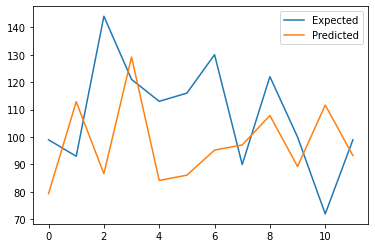

In [203]:
# load the dataset
series = dallas_ts
values = series.values
# transform the time series data into supervised learning
data = series_to_supervised(values, n_in=6)
# evaluate
mae, y, yhat = walk_forward_validation(data, 12)
print('MAE: %.3f' % mae)
# plot expected vs preducted
pyplot.plot(y, label='Expected')
pyplot.plot(yhat, label='Predicted')
pyplot.legend()
pyplot.show()

/Users/joshnoble/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:104: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


>expected=372.0, predicted=310.6
>expected=553.0, predicted=320.8
>expected=344.0, predicted=317.6
>expected=221.0, predicted=255.0
>expected=299.0, predicted=275.7
>expected=539.0, predicted=342.6
>expected=386.0, predicted=300.9
>expected=332.0, predicted=321.4
>expected=178.0, predicted=332.2
>expected=522.0, predicted=261.8
>expected=570.0, predicted=401.8
>expected=393.0, predicted=436.2
MAE: 107.934


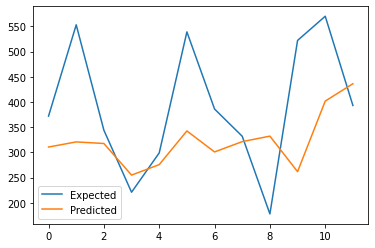

In [206]:
# load the dataset
series = dallas_week_ts
values = series.values
# transform the time series data into supervised learning
data = series_to_supervised(values, n_in=6)
# evaluate
mae, y, yhat = walk_forward_validation(data, 12)
print('MAE: %.3f' % mae)
# plot expected vs preducted
pyplot.plot(y, label='Expected')
pyplot.plot(yhat, label='Predicted')
pyplot.legend()
pyplot.show()